**Mounting Colab to Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
#Changing the path to My Drive Folder or Path
%cd /content/drive/My Drive/Colab Notebooks/Mini_Project

/content/drive/My Drive/Colab Notebooks/Mini_Project


In [ ]:
#list of files in that path or current working directory
ls

CNN.hdf5  dataset@     DenseNet.npy   MobNetmodel.h5  ResNet.npy  VGG19.npy
CNN.npy   DenseNet.h5  MobileNet.npy  ResNet152.h5    VGG19.h5


In [ ]:
# change to dataset directory
os.chdir('dataset/')

In [ ]:
ls  
#COVID and non-COVID Folder dataset

COVID/  kaggle.json  non-COVID/  sarscov2-ctscan-dataset.zip


**COVID 19 Positive CT Scan Images**

In [ ]:
base_path=os.getcwd()

In [ ]:
base_path

'/content/drive/.shortcut-targets-by-id/1VwhZDV0bBTyj8H7xhGpkCh6H40LS7-zT/dataset'

In [ ]:
clas='/COVID/'
image_path=os.listdir('COVID')

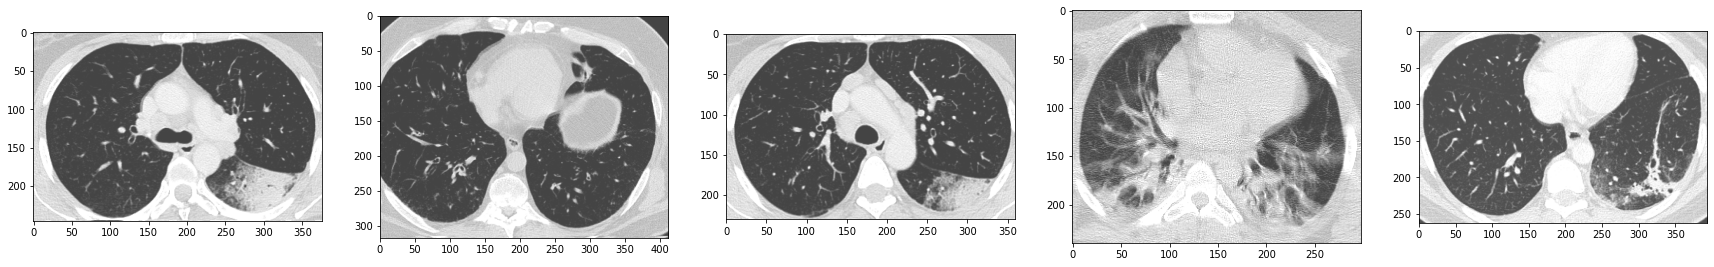

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig,axes=plt.subplots(1,5,figsize=(30,10))
for i in range(0,5):
  path=base_path+clas+image_path[i]
  image=mpimg.imread(path,0)
  axes[i].imshow(image)
  

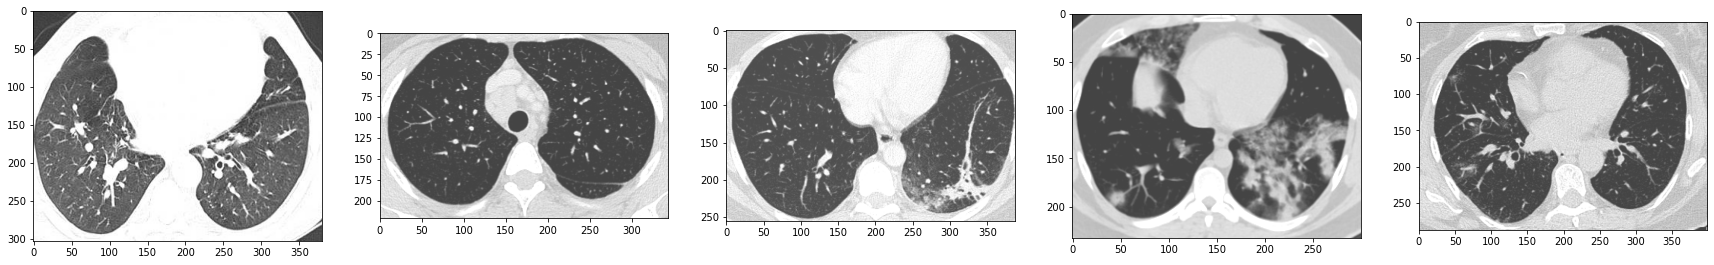

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(30,10))
k=0
for i in range(10,15):
  path=base_path+clas+image_path[i]
  image=mpimg.imread(path)
  axes[k].imshow(image)
  k=k+1

**Non Covid -19 CT scan Images**

In [ ]:
clas2='/non-COVID/'
im_path2=os.listdir('non-COVID')

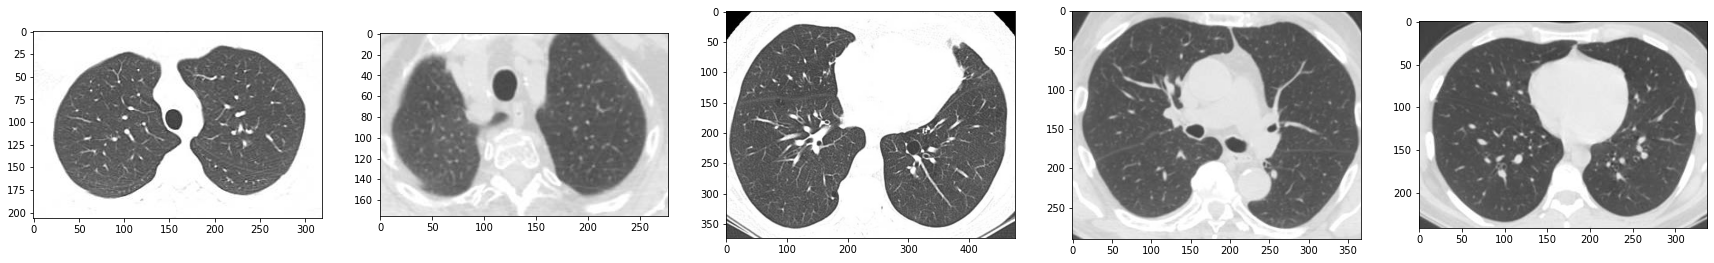

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(30,10))
for i in range(0,5):
  path=base_path+clas2+im_path2[i]
  image=mpimg.imread(path,0)
  axes[i].imshow(image)

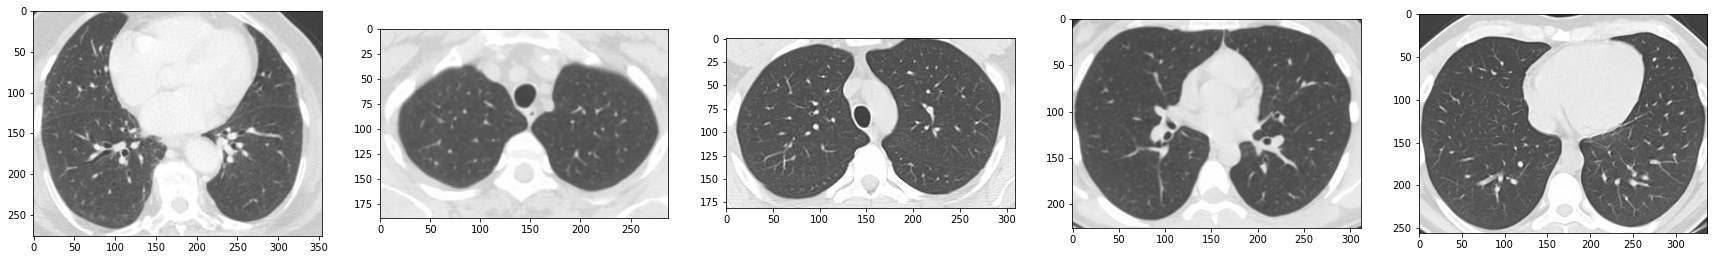

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(30,10))
k=0
for i in range(10,15):
  path=base_path+clas2+im_path2[i]
  image=mpimg.imread(path,0)
  axes[k].imshow(image)
  k+=1

**Import all the Required Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Mini_Project

/content/drive/My Drive/Colab Notebooks/Mini_Project


**Image Augmentation**

In [ ]:
TRAINING_DIR='dataset/'
training_datagen=ImageDataGenerator(
    featurewise_center=True, samplewise_center=True,
    featurewise_std_normalization=True, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=30, width_shift_range=0.2,
    height_shift_range=0.2, brightness_range=None, shear_range=0.4, zoom_range=0.4, fill_mode='nearest',
    horizontal_flip=True, vertical_flip=True, rescale=1./255, validation_split=0.2
)
train_generator=training_datagen.flow_from_directory(TRAINING_DIR,
                                                     target_size=(64,64),
                                                     shuffle=True,
                                                     batch_size=128,
                                                     class_mode='categorical',
                                                     subset='training')
validation_generator=training_datagen.flow_from_directory(TRAINING_DIR,
                                                          target_size=(64,64),
                                                          class_mode='categorical',
                                                          subset='validation')

Found 1986 images belonging to 2 classes.
Found 495 images belonging to 2 classes.


**CONVOLUTION NEURAL NETWORK**

Convolution Neural Network Architecture

In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(64,64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

**COMPILE the Model**

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

**Model Summary**

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 256)        

**Training the Model**

In [ ]:
my_model=model.fit_generator(train_generator,epochs=50,validation_data=validation_generator,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
16/16 [==============================] - 585s 37s/step - loss: 0.6973 - accuracy: 0.5176 - recall_2: 0.5176 - precision_2: 0.5176 - val_loss: 0.6929 - val_accuracy: 0.5051 - val_recall_2: 0.5051 - val_precision_2: 0.5051
Epoch 2/50
16/16 [==============================] - 15s 962ms/step - loss: 0.6928 - accuracy: 0.5040 - recall_2: 0.5040 - precision_2: 0.5040 - val_loss: 0.6929 - val_accuracy: 0.5051 - val_recall_2: 0.5051 - val_precision_2: 0.5051
Epoch 3/50
16/16 [==============================] - 15s 968ms/step - loss: 0.6930 - accuracy: 0.5111 - recall_2: 0.5111 - precision_2: 0.5111 - val_loss: 0.6925 - val_accuracy: 0.5051 - val_recall_2: 0.5051 - val_precision_2: 0.5051
Epoch 4/50
16/16 [==============================] - 16s 1s/step - loss: 0.6927 - accuracy: 0.5201 - recall_2: 0.5201 - precision_2: 0.5201 - val_loss: 0.6878 - val_accuracy: 0.6586 - val_recall_2: 0.6586 - val_precision_2: 0.6586
Epoch 5/50
16/16 [==============================] - 16s 1s/step - loss: 

In [ ]:
model.save('CNN.hdf5')

**Accuracy Increasing on Each Epoch**

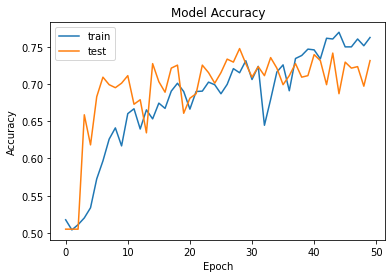

In [ ]:
plt.plot(my_model.history['accuracy'])
plt.plot(my_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Loss Decreasing On Each Epoch**

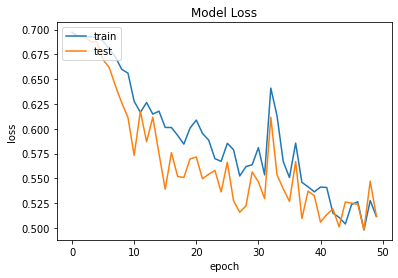

In [ ]:
plt.plot(my_model.history['loss'])
plt.plot(my_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.save('CNN.npy',my_model.history)

**Transfer Learning Network Models**

**Import Required Libraries**

In [ ]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121,ResNet152V2,VGG19,InceptionV3,MobileNetV2,Xception
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

**DenseNet121 CNN Model** 

In [ ]:
#Model Intialization
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(64,64,3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer


29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
#Summary of the model with assigning the Input layers and Output Class Prediction  
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#Remove the Fully Connected Sequential Layer for our Classification 
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
#compile the model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('DenseNet.h5', verbose=1, save_best_only=True)




# Fits-the-model i.e train the model 
history = model.fit_generator(train_generator,
               epochs=50,
               verbose=1,
               callbacks=[anne, checkpoint],
               validation_data=validation_generator)

Epoch 1/50
16/16 [==============================] - 27s 1s/step - loss: 1.0346 - accuracy: 0.6511 - recall_3: 0.6511 - precision_3: 0.6511 - val_loss: 1.1914 - val_accuracy: 0.6202 - val_recall_3: 0.6202 - val_precision_3: 0.6202

Epoch 00001: val_loss improved from inf to 1.19144, saving model to DenseNet.h5
Epoch 2/50
16/16 [==============================] - 15s 979ms/step - loss: 0.8357 - accuracy: 0.7029 - recall_3: 0.7029 - precision_3: 0.7029 - val_loss: 0.7093 - val_accuracy: 0.6444 - val_recall_3: 0.6444 - val_precision_3: 0.6444

Epoch 00002: val_loss improved from 1.19144 to 0.70927, saving model to DenseNet.h5
Epoch 3/50
16/16 [==============================] - 15s 972ms/step - loss: 0.7399 - accuracy: 0.6989 - recall_3: 0.6989 - precision_3: 0.6989 - val_loss: 0.5774 - val_accuracy: 0.6929 - val_recall_3: 0.6929 - val_precision_3: 0.6929

Epoch 00003: val_loss improved from 0.70927 to 0.57738, saving model to DenseNet.h5
Epoch 4/50
16/16 [==============================] - 1

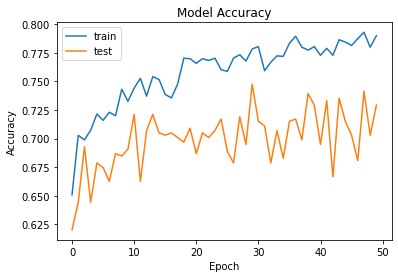

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

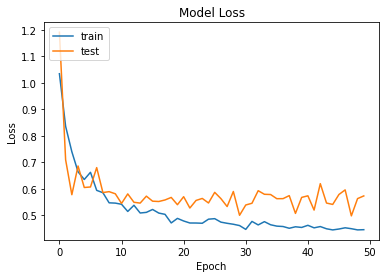

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.save('DenseNet.npy',history.history)

**MobileNet CNN Model**

In [ ]:
model_d=MobileNetV2(weights='imagenet',include_top=False, input_shape=(64,64,3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer


9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 32, 32, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 32, 32, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 32, 32, 32)   0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('MobNetmodel.h5', verbose=1, save_best_only=True)




# Fits-the-model
history = model.fit_generator(train_generator,
               epochs=50,
               verbose=1,
               callbacks=[anne, checkpoint],
               validation_data=validation_generator)

Epoch 1/50
16/16 [==============================] - 19s 1s/step - loss: 1.1281 - accuracy: 0.6098 - recall_5: 0.6098 - precision_5: 0.6098 - val_loss: 0.6043 - val_accuracy: 0.6929 - val_recall_5: 0.6929 - val_precision_5: 0.6929

Epoch 00001: val_loss improved from inf to 0.60431, saving model to MobNetmodel.h5
Epoch 2/50
16/16 [==============================] - 15s 920ms/step - loss: 0.9456 - accuracy: 0.6485 - recall_5: 0.6485 - precision_5: 0.6485 - val_loss: 0.6175 - val_accuracy: 0.6747 - val_recall_5: 0.6747 - val_precision_5: 0.6747

Epoch 00002: val_loss did not improve from 0.60431
Epoch 3/50
16/16 [==============================] - 15s 918ms/step - loss: 0.8298 - accuracy: 0.6722 - recall_5: 0.6722 - precision_5: 0.6722 - val_loss: 0.6319 - val_accuracy: 0.6707 - val_recall_5: 0.6707 - val_precision_5: 0.6707

Epoch 00003: val_loss did not improve from 0.60431
Epoch 4/50
16/16 [==============================] - 14s 916ms/step - loss: 0.7183 - accuracy: 0.6747 - recall_5: 0.6

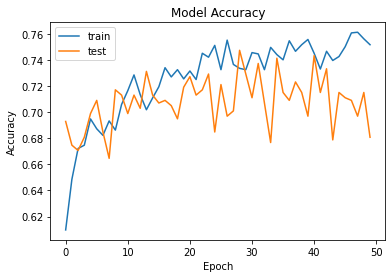

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

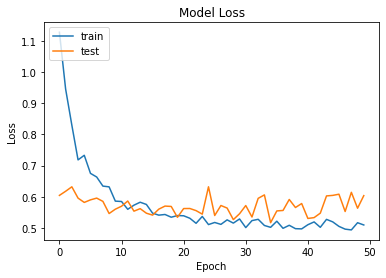

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.save('MobileNet.npy',history.history)

**ResNet152V2 Model**

In [ ]:
model_d=ResNet152V2(weights='imagenet',include_top=False, input_shape=(64, 64, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer


234553344/234545216 [==============================] - 3s 0us/step


In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 34, 34, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('ResNet152.h5', verbose=1, save_best_only=True)




# Fits-the-model
history = model.fit_generator(train_generator,
               epochs=50,
               verbose=1,
               callbacks=[anne, checkpoint],
               validation_data=validation_generator)

Epoch 1/50
16/16 [==============================] - 28s 1s/step - loss: 1.1466 - accuracy: 0.6088 - recall_6: 0.6088 - precision_6: 0.6088 - val_loss: 1.0766 - val_accuracy: 0.5737 - val_recall_6: 0.5737 - val_precision_6: 0.5737

Epoch 00001: val_loss improved from inf to 1.07661, saving model to ResNet152.h5
Epoch 2/50
16/16 [==============================] - 16s 1s/step - loss: 1.0444 - accuracy: 0.6415 - recall_6: 0.6415 - precision_6: 0.6415 - val_loss: 0.8490 - val_accuracy: 0.6202 - val_recall_6: 0.6202 - val_precision_6: 0.6202

Epoch 00002: val_loss improved from 1.07661 to 0.84901, saving model to ResNet152.h5
Epoch 3/50
16/16 [==============================] - 16s 1s/step - loss: 0.8304 - accuracy: 0.6511 - recall_6: 0.6511 - precision_6: 0.6511 - val_loss: 0.6283 - val_accuracy: 0.7071 - val_recall_6: 0.7071 - val_precision_6: 0.7071

Epoch 00003: val_loss improved from 0.84901 to 0.62832, saving model to ResNet152.h5
Epoch 4/50
16/16 [==============================] - 16s 

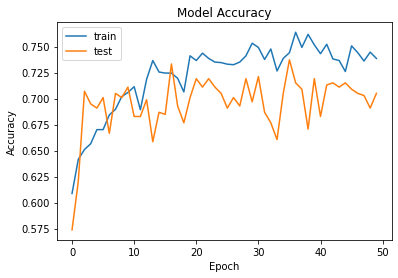

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

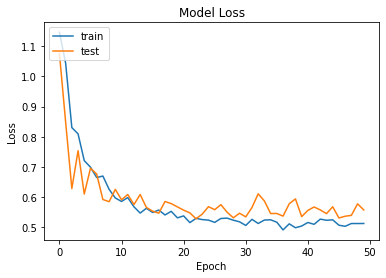

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.save('ResNet.npy',history.history)

**VGG19 CNN Model**

In [ ]:
model_d=VGG19(weights='imagenet',include_top=False, input_shape=(64,64,3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer


In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('VGG19.h5', verbose=1, save_best_only=True)

# Fits-the-model
history = model.fit_generator(train_generator,
               validation_data=validation_generator,
               epochs=50,
               verbose=1,
               callbacks=[anne, checkpoint])

Epoch 1/50
16/16 [==============================] - 20s 1s/step - loss: 1.0157 - accuracy: 0.6586 - recall_7: 0.6586 - precision_7: 0.6586 - val_loss: 0.7742 - val_accuracy: 0.5051 - val_recall_7: 0.5051 - val_precision_7: 0.5051

Epoch 00001: val_loss improved from inf to 0.77421, saving model to VGG19.h5
Epoch 2/50
16/16 [==============================] - 15s 962ms/step - loss: 0.9108 - accuracy: 0.6823 - recall_7: 0.6823 - precision_7: 0.6823 - val_loss: 0.6372 - val_accuracy: 0.5838 - val_recall_7: 0.5838 - val_precision_7: 0.5838

Epoch 00002: val_loss improved from 0.77421 to 0.63722, saving model to VGG19.h5
Epoch 3/50
16/16 [==============================] - 15s 938ms/step - loss: 0.7912 - accuracy: 0.6903 - recall_7: 0.6903 - precision_7: 0.6903 - val_loss: 0.6206 - val_accuracy: 0.6545 - val_recall_7: 0.6545 - val_precision_7: 0.6545

Epoch 00003: val_loss improved from 0.63722 to 0.62056, saving model to VGG19.h5
Epoch 4/50
16/16 [==============================] - 15s 969ms/

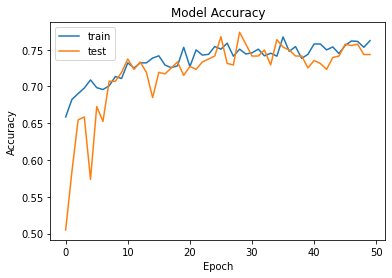

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

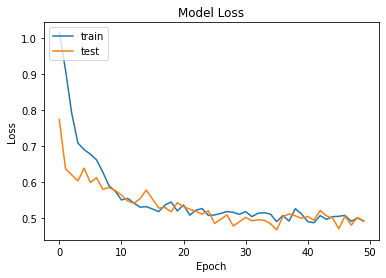

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.save('VGG19.npy',history.history)

**Xception CNN Model**

In [ ]:
model_d=Xception(weights='imagenet',include_top=False, input_shape=(71,71,3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(1024,activation='relu')(x) 
x= Dense(512,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(2,activation='softmax')(x) #FC-layer

In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 71, 71, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('Xnception.h5', verbose=1, save_best_only=True)

# Fits-the-model
history = model.fit_generator(train_generator,
               validation_data=validation_generator,
               epochs=50,
               verbose=1,
               callbacks=[anne, checkpoint])

Epoch 1/50
16/16 [==============================] - 22s 1s/step - loss: 1.0684 - accuracy: 0.6032 - recall: 0.6032 - precision: 0.6032 - val_loss: 0.8861 - val_accuracy: 0.5414 - val_recall: 0.5414 - val_precision: 0.5414

Epoch 00001: val_loss improved from inf to 0.88610, saving model to Xnception.h5
Epoch 2/50
16/16 [==============================] - 15s 932ms/step - loss: 0.8468 - accuracy: 0.6279 - recall: 0.6279 - precision: 0.6279 - val_loss: 0.6159 - val_accuracy: 0.6990 - val_recall: 0.6990 - val_precision: 0.6990

Epoch 00002: val_loss improved from 0.88610 to 0.61589, saving model to Xnception.h5
Epoch 3/50
16/16 [==============================] - 15s 947ms/step - loss: 0.7713 - accuracy: 0.6440 - recall: 0.6440 - precision: 0.6440 - val_loss: 0.6114 - val_accuracy: 0.6687 - val_recall: 0.6687 - val_precision: 0.6687

Epoch 00003: val_loss improved from 0.61589 to 0.61138, saving model to Xnception.h5
Epoch 4/50
16/16 [==============================] - 15s 945ms/step - loss:

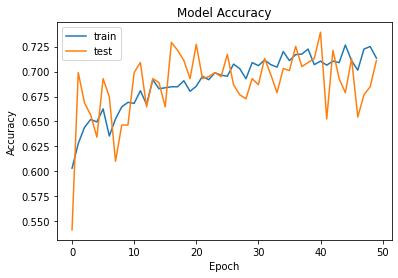

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

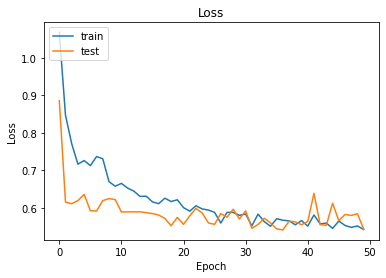

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.save('xception.npy',history.history)